# Predicting CLTV & Repeat Customers on Shopify Platform with Machine Learning.

<div>
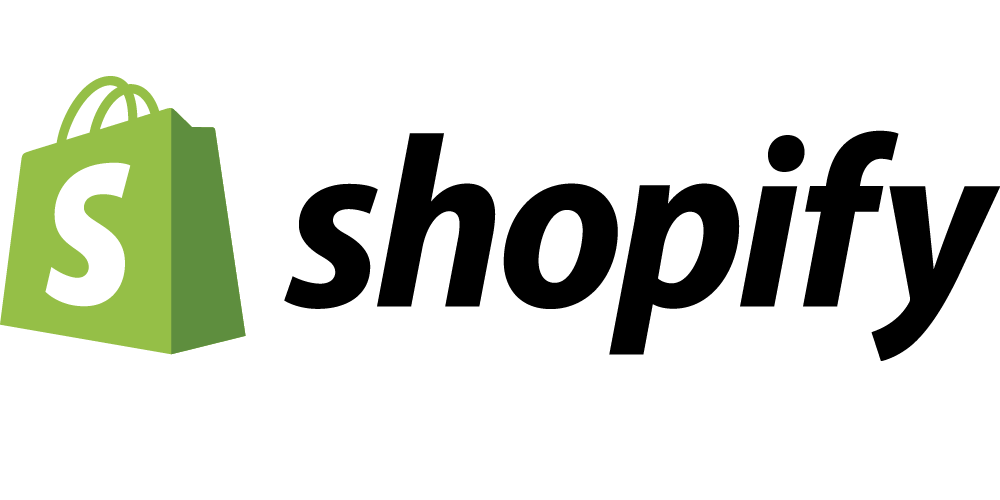
</div>

###  TABLE OF CONTENTS: 

<br> **I. INTRODUCTION**  
- 1. Project Purpose.
- 2. Loading our data.
- 3. Previewing our data

<br> **II. DATA WRANGLING**  
- 1. Cleaning up and fixing issues. 
- 2. Creating 3 separate dataframes. 

<br> **III. EXPLORATORY DATA ANALYSIS**  
- 1.
- 2.

<br> **IV. PREPROCESSING AND TRAINING DATA** 
- 1.
- 2.

<br> **V. MODELLING**  
- 1.
- 2.

<br> **VI. CONCLUSIONS** 
- 1.
- 2. 

# I. Introduction: 

### 1. Project Purpose.

<p> Welcome to this Tutorial on Extracting Shopify Data to create a Customer Lifetime Value (CLTV) Analysis! This notebook will walk you through the steps so you too can replicate this for your business! 

<p> As of 2021, e-commerce is, worldwide, a $4.89 trillion industry. One of the leading platforms in the marketplace is Shopify which currently holds a 23% market share in the United States with over 2.6 million live stores. For Perspective, there is about 1 store for every 130 Americans. With e-commerce expected to keep growing in the future, it is important for current and future Shopify store-owners to get the most use  of the available data the platform provides.
This project will apply the Data Science method to learn more about customer behavior  and create a Customer Lifetime Value Analysis (CLTV) with some Machine Learning techniques from Shopify Data. The purpose will be to understand what makes customers become repeat customers and use the information collected to generate more revenue by increasing LTV. 

<p> Shopify data is usually standardized when exporting orders in csv format. In this dataset, the original raw export is  organized where each row represents an item sold with ~73 columns that provide information on the item purchased. Most of these will not be useful for this analysis and dropped early on. 

<br> **Featured columns include:**

- *Name*: This refers to the Order Id. This is not unique, as there can be multiple items in one order. 
- *Email*: This is the email of the customer, which is used to identify a customer. 
- *Paid at*: This column refers to the time and date the transaction occurred. There is only one date for each Order, so it is normal if there are blanks provided. Other columns follow this logic 
- *Subtotal*: This refers to the subtotal for each order.  
- *Lineitem name*: This refers to the name of the product. Typically, a store sets up the product name where we can get information such as the size, type and color of the product in question. This column should never be empty. 
- *Line Item Quantity and Line Item Price*: These columns design how much of each item and their price, respectively, and shouldn’t contain missing values. 

How a shopify store is organized to collect data may result in possible missing values or incomplete transactions(as was the case for this company). The analysis will clean some data but assumes that there are no missing values in the “Created at”,  “Lineitem name”, and “LineItem Price” columns since all of these refer to each individual item sold and if there is missing data in these, they will need to be dropped. For a more detailed guide on understanding shopify data and more details on the columns, please refer to this sheet.
The data used for this analysis comes from a real company which generated $1 million in YTD revenue. The data has been modified from its original version to protect the anonymity of the company as well as the information of all its customers. 

<br> The original export file which will be analyzing  has been modified with the following alterations: 

- Columns *“Billing Name “ , “ Billing Street“ , “Billing Address1 “ , “Billing Address2 “ , “Billing Company “ , “Billing Phone “ , “Shipping Name “ , “ Shipping Street“ , “Shipping Address1 “ , “Shipping Address2 “ , “Shipping Company “ , “Shipping Phone “*  have all been replaced with null values. These columns will not be used in the analysis and dropped early on shortly after the introduction .
- Values in the *“Email”* column have been replaced with a unique Email Id for each customer instead of their actual emails. 
- Column *“Line-item name”* has substituted product names. 

 


### 2. Loading our packages and Dataframe. 

In [1]:
## We start by importing the appropriate packages which we will want to use. 
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import warnings
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing
%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
## We create our dataframe with the raw data.
raw_data = pd.read_csv('.\CLEANED_data.csv')

### 3. Previewing our data.

In [3]:
# We preview the first 5 rows of our dataframe.
raw_data.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Created at,Lineitem quantity,Lineitem name,Lineitem price,Lineitem compare at price,Lineitem sku,Lineitem requires shipping,Lineitem taxable,Lineitem fulfillment status,Billing Name,Billing Street,Billing Address1,Billing Address2,Billing Company,Billing City,Billing Zip,Billing Province,Billing Country,Billing Phone,Shipping Name,Shipping Street,Shipping Address1,Shipping Address2,Shipping Company,Shipping City,Shipping Zip,Shipping Province,Shipping Country,Shipping Phone,Notes,Note Attributes,Cancelled at,Payment Method,Payment Reference,Refunded Amount,Vendor,Id,Tags,Risk Level,Source,Lineitem discount,Tax 1 Name,Tax 1 Value,Tax 2 Name,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,Receipt Number,Duties,Billing Province Name,Shipping Province Name,Payment Terms Name,Next Payment Due At
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,NaN,no,USD,142.0,0.00,11.72,153.72,NaN,0.0,Free Shipping,11/11/2021 16:53,1,Mint Crossback Sports Bra - S,38.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,NaN,NaN,DIXON,'61021,IL,US,NaN,NaN,NaN,NaN,Shopify Payments,c29208367530214.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,Dixon City Tax 0.5%,0.71,Illinois State Tax 6.25%,8.88,Lee County Tax 1.5%,2.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Illinois,Illinois,NaN,NaN
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,300.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/11/2021 16:53,1,Black/Mint Contour Leggings - XS,52.0,NaN,100.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,#29488,Anonymous9987,paid,11/11/2021 10:09,unfulfilled,NaN,no,USD,40.0,5.36,2.90,48.26,NaN,0.0,Standard Shipping,11/11/2021 10:09,1,Black Long Sleeve Top - L,40.0,NaN,102.0,True,True,pending,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,NaN,NaN,Moreno Valley,'92553,CA,US,NaN,NaN,NaN,NaN,Afterpay North America,c29207688708326.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,California State Tax 7.25%,2.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,California,California,NaN,NaN
4,#29487,Anonymous9675,paid,11/10/2021 14:54,fulfilled,11/11/2021 10:56,no,USD,94.0,5.06,0.00,99.06,NaN,0.0,Standard Shipping,11/10/2021 14:54,1,Raspberry Crossover Sports Bra - XL,38.0,NaN,53.0,True,True,fulfilled,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,NaN,NaN,ELKINS PARK,19027-1829,PA,US,NaN,NaN,NaN,NaN,Shopify Payments,c29206160441574.1,0.0,NaN,4.550000e+12,NaN,Low,web,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pennsylvania,Pennsylvania,NaN,NaN


In [4]:
# We now look at the columns to get more information about them. 
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50418 entries, 0 to 50417
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         50418 non-null  object 
 1   Email                        46372 non-null  object 
 2   Financial Status             28489 non-null  object 
 3   Paid at                      27735 non-null  object 
 4   Fulfillment Status           28489 non-null  object 
 5   Fulfilled at                 27256 non-null  object 
 6   Accepts Marketing            28489 non-null  object 
 7   Currency                     28489 non-null  object 
 8   Subtotal                     28489 non-null  float64
 9   Shipping                     28489 non-null  float64
 10  Taxes                        28489 non-null  float64
 11  Total                        28489 non-null  float64
 12  Discount Code                7339 non-null   object 
 13  Discount Amount 

# II. Data Wrangling: 

## 1. Cleaning our Data.  

### Step 1: Removing redundant and uncessary columns 

As mentionned in the introduction, certain columns are unessary in this analysis, thus we can remove them.

In [5]:
## We create a list of columns to drop and use the drop data to remove them from our dataframe.
columns_to_drop = ['Fulfilled at','Currency','Created at','Lineitem compare at price','Lineitem requires shipping','Lineitem taxable','Lineitem fulfillment status','Billing Name','Billing Street','Billing Address1','Billing Address2','Billing Company','Billing Phone','Shipping Name','Shipping Street','Shipping Address1','Shipping Address2','Shipping Company','Shipping City','Shipping Zip','Shipping Province','Shipping Country','Shipping Phone','Notes','Note Attributes','Payment Reference','Vendor','Id','Tags','Risk Level','Source','Tax 1 Name','Tax 1 Value','Tax 2 Name','Tax 2 Value','Tax 3 Name','Tax 3 Value','Tax 4 Name','Tax 4 Value','Tax 5 Name','Tax 5 Value','Phone','Receipt Number','Duties','Billing Province Name','Shipping Province Name','Payment Terms Name','Next Payment Due At','Lineitem sku']
raw_data.drop(columns=columns_to_drop, inplace = True)
raw_data.head(3)

,Name,Email,Financial Status,Paid at,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 2: Renaming Columns
Some columns would need more appropriate / relevant names.

In [6]:
## We use the rename method to change the column names. 
raw_data = raw_data.rename(columns={'Name': 'OrderID','Paid at': 'Transaction Date','Email':'CustomerID'} )
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,NaN,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 3: Cleaning up NaN values. 
Many values in this dataset appear as NaN. This is because: 

 - Some columns will ...
 - Some columns will ...

In [7]:
# We use the fillna method to fill "NaN" values with either empty strings or 0s to clean our data.
raw_data['Discount Code'] = raw_data['Discount Code'].fillna('')
raw_data['Discount Amount'] = raw_data['Discount Amount'].fillna(0)
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 4: Removing data for which we do not have emails: 
As mentionned in our introduction, while setting up our shopify data collection, some emails failed to be collected. We must remove the transactions for which we have missing emails as we do not know if the customer was repeat or not.

In [8]:
## Using dropna, we remove the rows for which no email is associated with the transaction. 
raw_data.dropna(subset=['CustomerID'], inplace = True)
raw_data.head(3)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount
0,#29489,Anonymous4245,paid,11/11/2021 16:53,unfulfilled,no,142.0,0.0,11.72,153.72,,0.0,Free Shipping,1,Mint Crossback Sports Bra - S,38.0,DIXON,'61021,IL,US,NaN,Shopify Payments,0.0,0.0
1,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Burgundy Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,#29489,Anonymous4245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,Black/Mint Contour Leggings - XS,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### Step 5: Converting Transaction Date to Datetime.
Our Transaction Date column needs to be converted to a Datetime object.

In [9]:
## We use pd.to_datetime to convert the 'Transaction Date' column to datetime object.  
raw_data['Transaction Date'] = pd.to_datetime(raw_data['Transaction Date'], errors='coerce')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46372 entries, 0 to 50416
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   OrderID             46372 non-null  object        
 1   CustomerID          46372 non-null  object        
 2   Financial Status    25909 non-null  object        
 3   Transaction Date    25188 non-null  datetime64[ns]
 4   Fulfillment Status  25909 non-null  object        
 5   Accepts Marketing   25909 non-null  object        
 6   Subtotal            25909 non-null  float64       
 7   Shipping            25909 non-null  float64       
 8   Taxes               25909 non-null  float64       
 9   Total               25909 non-null  float64       
 10  Discount Code       46372 non-null  object        
 11  Discount Amount     46372 non-null  float64       
 12  Shipping Method     25383 non-null  object        
 13  Lineitem quantity   46372 non-null  int64     

## 2. Creating Seperate Dataframes. 

Now that we have cleaned our data, we will want to create three seperate dataframes. 
- Customers: 
- Orders: 
- Items: 

In [10]:
## Let's see how many unique values will be in each dataframe. 
print('The number of unique orders in this dataset is: ' + str(raw_data['OrderID'].nunique()))
print('The number of unique customers in this dataset is: ' + str(raw_data['CustomerID'].nunique()))
print('The number of unique items sold in this dataset is: ' +str(raw_data['Lineitem name'].nunique()))

The number of unique orders in this dataset is: 25909
The number of unique customers in this dataset is: 16472
The number of unique items sold in this dataset is: 566


### Creating a unique customers dataframe.
This dataframe will re-organize our data so that each unique customer has its own row. As we are working on analyzing the CLTV ratio of our customers, we will need to get information about each of the customers. 

In [11]:
## Prior to creating our dataframe, we define functions which we will be used to retrieve infromation we want below. 
def count_discount_codes(discount_codes):
    '''
    This function returns the number of distinct coupons used 
    '''
    counter = 0
    for entry in discount_codes:
        if entry != '':
            counter += 1
    return counter

def time_elapsed(x):
    '''
    This function returns the number of days between a customer's first order and most recent order.
    '''
    return (x.max() - x.min()).days

def order_freq(x):
    '''
    This function returns the how often a customer makes a purchase (in days)
    '''
    return (x.max() - x.min()).days / x.count()

def repeat_customer(x):
    '''
    This function return whether or not the customer is a repeat customer. 
    '''
    if x.max() != x.min():
        return 1
    else:
        return 0

In [12]:
## We create the customer dataframe. 
customer =  raw_data.groupby(['CustomerID']).agg(Number_of_Orders = ('OrderID', 'nunique'),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            Total_Spent = ('Subtotal', np.sum),
                                            Smallest_purchase = ('Subtotal', min),
                                            Largest_purchase = ('Subtotal', max),
                                            Average_order_spend = ('Subtotal', np.mean),
                                            Coupons_Used = ('Discount Code', count_discount_codes),                         
                                            First_Order = ('Transaction Date', np.min), 
                                            Most_Recent_Order = ('Transaction Date', np.max),
                                            Time_Elapsed_days = ('Transaction Date', time_elapsed),
                                            Frequency_in_days =('Transaction Date', order_freq),
                                            repeat_customer =('Transaction Date', repeat_customer)
                                            )

# We sort the values to get the customers who placed the most orders first. 
customer.sort_values('Number_of_Orders', ascending = False, inplace=True)


## We drop rows for which we don't have data and preview our customer table. 
customer.dropna(inplace=True)
customer.reset_index(inplace=True)
customer.head()

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer
0,Anonymous13455,36,42,1480.60,12.5,122.40,41.127778,14,2020-06-30 17:54:00,2021-10-15 16:10:00,471.0,13.083333,1
1,Anonymous2142,23,37,1244.90,0.0,126.00,54.126087,11,2019-05-09 15:48:00,2021-08-10 09:57:00,823.0,39.190476,1
2,Anonymous4843,22,56,2259.05,48.0,156.75,102.684091,3,2019-10-14 22:08:00,2021-10-15 16:59:00,731.0,36.550000,1
3,Anonymous11225,21,27,1022.85,16.0,140.00,48.707143,5,2020-01-31 17:54:00,2021-05-25 13:46:00,479.0,23.950000,1
4,Anonymous540,20,43,1534.10,22.0,176.00,76.705000,15,2020-01-03 16:21:00,2021-08-09 09:02:00,583.0,30.684211,1


In [13]:
## We check for the repeat for the number of customers.
customer['repeat_customer'].value_counts()

0    11624
1     4556
Name: repeat_customer, dtype: int64

At a glance, it appears that repeat customers represent ~**28%** of our clientele.

In [14]:
## We can use this to check if a customer is repeat or not
customer.query("CustomerID == 'Anonymous5678'")

,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer
3761,Anonymous5678,2,3,140.0,40.0,100.0,70.0,0,2021-03-11 18:01:00,2021-03-19 17:58:00,7.0,3.5,1


### Creating a unique order dataframe.

In [15]:
# We create the orders dataframe. 
orders =  raw_data.groupby(['OrderID']).agg(Total_Spent = ('Subtotal', np.sum),
                                            Total_Items_Purchased = ('Lineitem quantity', np.sum),
                                            CustomerID = ('CustomerID', np.max),
                                            Transaction_Date = ('Transaction Date', np.max)
                                            )

orders.reset_index(inplace= True)

## We remove the '#' from OrdersID and change it to int type. 
orders['OrderID'] = orders['OrderID'].apply(lambda x: x.replace('#','')).astype(int)

## We sort by OrderID, and preview the dataframe. 
orders = orders.sort_values('OrderID', ascending = False)
orders.dropna(inplace=True)

## We add a column to identify the customers who made a repeat purchase.
duplicated_orders = list(orders.CustomerID[orders.CustomerID.duplicated()])
orders['repeat_customer'] = np.where(orders['CustomerID'].apply(lambda x: x in duplicated_orders),1,0)
orders.head(3)


,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00,1
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00,1
20608,29487,94.0,2,Anonymous9675,2021-11-10 14:54:00,0


In [16]:
## We can check how many orders came from repeat customers as opposed to one-time customers. 
orders['repeat_customer'].value_counts()

1    13565
0    11623
Name: repeat_customer, dtype: int64

It appears that repeat more than half of orders (**52%**) are made by repeat customers. This is a reason to engage with them more and to make more of them. 

In [17]:
## We can take a look at a customer who made several orders. 
orders.query("CustomerID == 'Anonymous4572'")

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
18881,27884,45.5,2,Anonymous4572,2021-06-23 13:29:00,1
20809,3224,36.0,1,Anonymous4572,2018-12-04 18:06:00,1


### Creating a unique item dataframe.

In [18]:
# We create our items dataframe. 
items =  raw_data.groupby(['Lineitem name']).agg(Times_Purchased = ('Lineitem quantity', np.sum),
                                                 Price = ('Lineitem price', np.max)
                                                 )

items.sort_values('Times_Purchased', ascending = False, inplace=True)
items.reset_index(inplace=True)

## We create a size column seperating it in 6 different sizes and a no size. 
"""
Filling item info: 
 - left column is the desired label (for example for sizes, 'L', 'M' etc.)
 - right column between [] is the list (separated by commas) of ways the info can appear in the item's name
See example below on how to fill for item sizes if the sizes show up as "... / L" or "... - L", etc.
"""

def get_item_size(row):
    dict_sizes = {'XS': ['- XS', '/ XS'],
                  'S': ['- S', '/ S'],
                  'M': ['- M', '/ M'],
                  'L': ['- L', '/ L'],
                  'XL': ['- XL', '/ XL'],
                  'XXL': ['- XXL', '/ XXL']}

    item_name = row['Lineitem name']
    for key in dict_sizes.keys():
        for value in dict_sizes[key]:
            if value in item_name:
                return key
    return 'No size'

items['size'] = items.apply(get_item_size, axis=1)

## We create an item type column and seperate in 12 different products and other. 
"""
The method is the same for the size method above, but this time with product type. 
"""


def get_item_type(row):
    dict_items = {'Long Sleeve': ['Long Sleeve'],
                  'Barbell': ['Barbell'],
                  'Cable Cuffs': ['Cable Cuffs'],
                  'Resistance Bands': ['Resistance Bands'],
                  'Leggings': ['Leggings'],
                  'Sports Bra': ['Sports Bra'],
                  'Jacket': ['Jacket'],
                  'Crop Tops': ['Crop Tops'],
                  'Shorts': ['Shorts'],
                  'Shirts': ['Shirts'],
                  'Sweater': ['Sweater'],
                  'Hoodie': ['Hoodie'],
                  'Camo': ['Camo']}
    
    item_name = row['Lineitem name']
    for key in dict_items.keys():
        for value in dict_items[key]:
            if value in item_name:
                return key
    return 'Other'
    
items['type'] = items.apply(get_item_type, axis=1)

## We create a unique product sku for each of these items. 
items['Product Sku'] = [i+1 for i in range(len(items))]

## We rearrange the columns so that Product Sku becomes our first column and preview. 
items = items.iloc[:, [5, 0, 1, 2, 3, 4]]
items.head(5)

,Product Sku,Lineitem name,Times_Purchased,Price,size,type
0,1,Black/Mint Contour Leggings - M,1042,50.0,M,Leggings
1,2,Black/Mint Contour Leggings - S,896,52.0,S,Leggings
2,3,Resistance Bands,650,25.0,No size,Resistance Bands
3,4,Black/Grey Contour Leggings - M,601,52.0,M,Leggings
4,5,Black/Dark Blue Contour Leggings - S,599,50.0,S,Leggings


# II. Exploratory Data Analysis 

In this section, we will be exploring the relationship of our 

#### Visualizing the distribution of First Orders

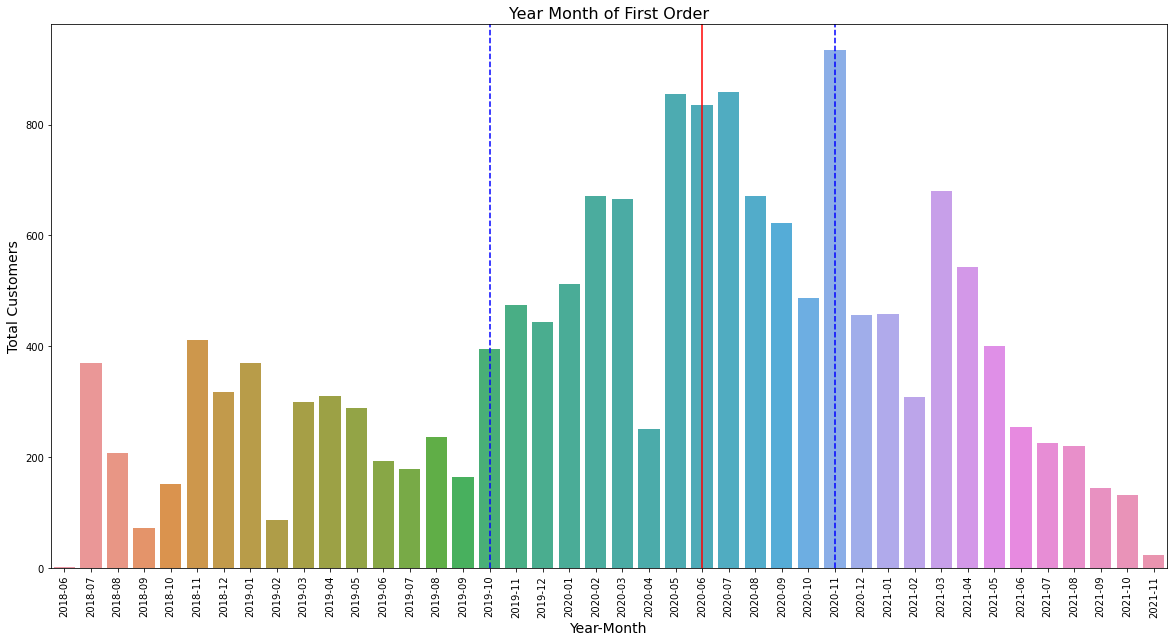

In [19]:
customer['year_month_oldest'] = customer['First_Order'].dt.to_period('M')
series = customer.groupby('year_month_oldest')['First_Order'].count()
df = series.to_frame().reset_index().sort_values('year_month_oldest')
def get_3Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= 0.75 * df['First_Order'].sum(): 
            return(df['First_Order'].index[i])
            break
def get_1Q():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter >= df['First_Order'].sum()/4: 
            return(df['First_Order'].index[i])
            break
def get_median():
    counter = 0
    for i in range(len(df['First_Order'])):   
        counter += df['First_Order'][i]
        if counter > df['First_Order'].sum()/2: 
            return(df['First_Order'].index[i])
            break
            
plt.figure(figsize=(20,10))
chart = sns.countplot(x= 'year_month_oldest', data = customer.sort_values('year_month_oldest'))
plt.xlabel('Year-Month', fontsize=14)
plt.ylabel('Total Customers', fontsize=14)
plt.title('Year Month of First Order', fontsize=16)
chart.set_xticklabels(chart.get_xticklabels(),rotation =90)
plt.axvline(get_median(), color ='r', label = 'Median')
plt.axvline(get_1Q(), color ='b', label = '1st Quartile',linestyle='--')
plt.axvline(get_3Q(), color ='b', label = '3rd Quartile',linestyle='--')
plt.show()

This visualization gives us a lot of important information. Half of all first orders were before June 2020 and 75% of them were before November 2020. It looks like the last month for which we have data available is Nov 2021. As a result, since we do appear to have a good amount of data that is well spread out, we can decide to calculate a 1 year CLTV interval, and we would be keeping 75% of our data by doing this. 

#### Visualizing the number of orders for repeat customers.

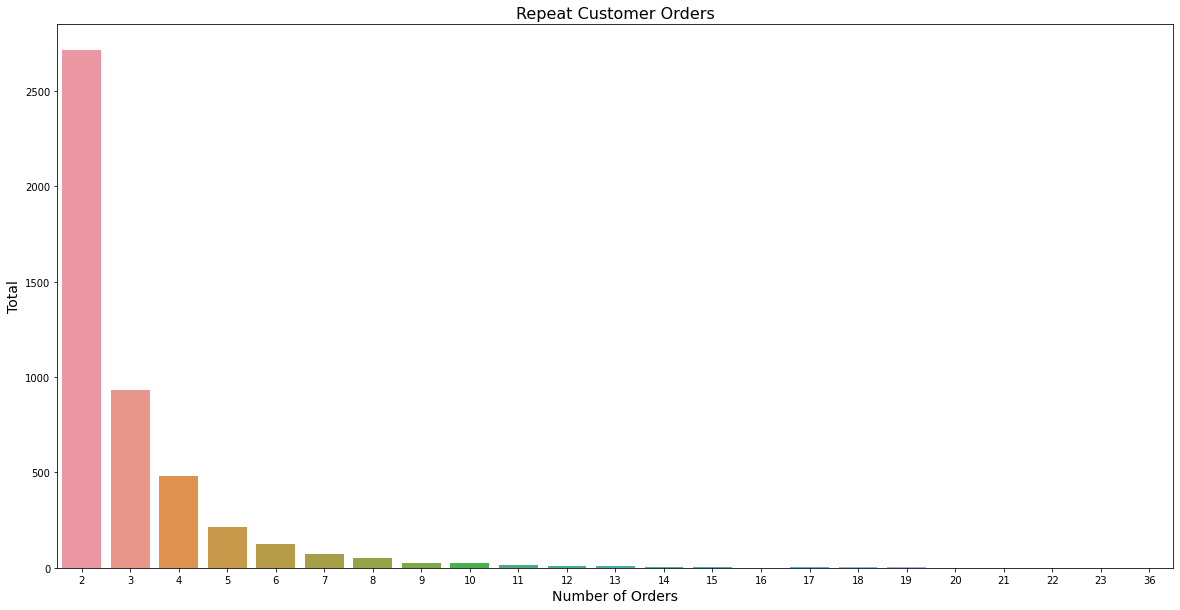

In [20]:
## Visualizing the repeat customers orders
_ = plt.figure(figsize=(20,10))
repeat_orders = customer[customer['Number_of_Orders'] > 1]
_ = sns.countplot(x= 'Number_of_Orders', data = repeat_orders)
_ = plt.xlabel('Number of Orders', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('Repeat Customer Orders', fontsize=16);
plt.show()

#### Visualizing the number of items purchased for repeat customers.

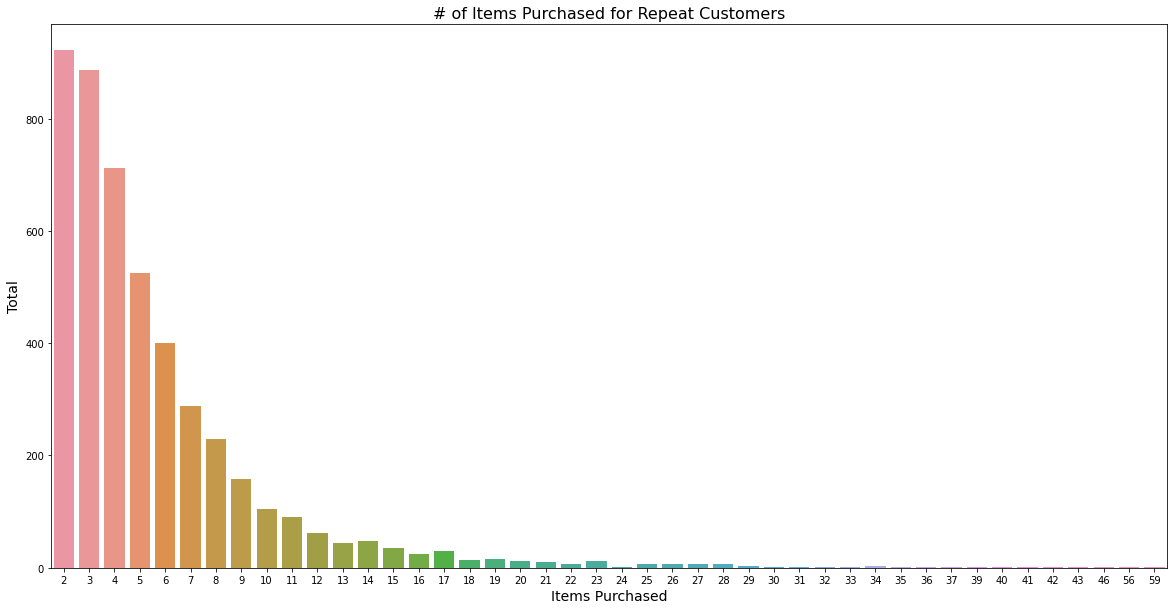

In [21]:
## Visualizing the number of items purchased for repeat customers. 
plt.figure(figsize=(20,10))
chart = sns.countplot(x= 'Total_Items_Purchased', data = repeat_orders)
_ = plt.xlabel('Items Purchased', fontsize=14)
_ = plt.ylabel('Total', fontsize=14)
_ = plt.title('# of Items Purchased for Repeat Customers', fontsize=16);

plt.show()

#### Visualizing the frequency of repeat customers. 

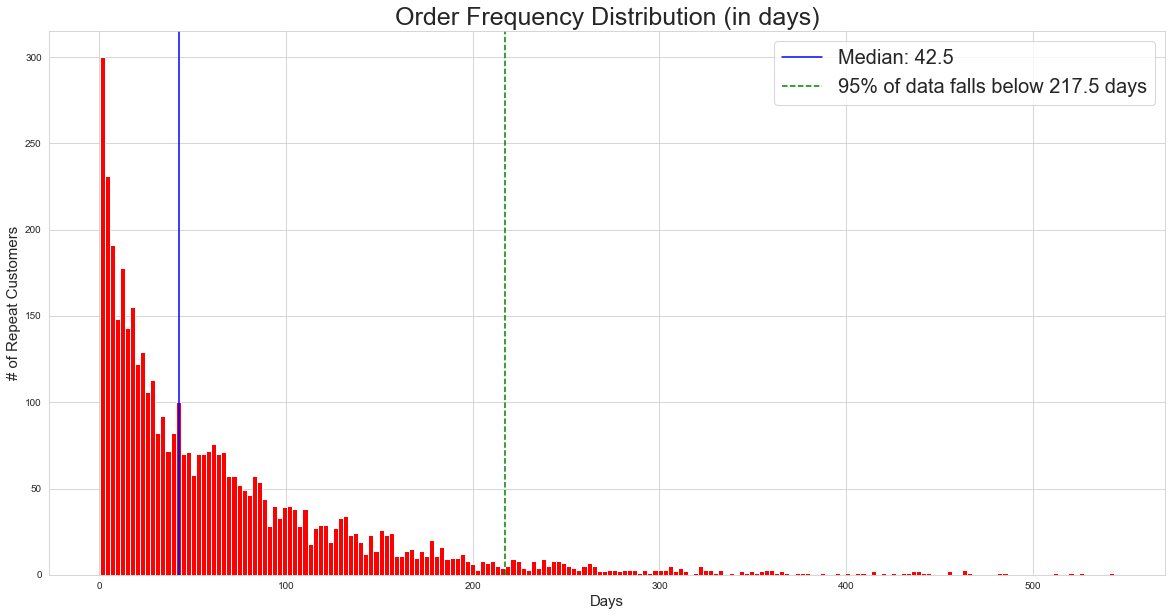

The average frequency of orders is ~ 67.0 days.
The median frequency of orders is ~  42.0 days.


In [22]:
sns.set_style("whitegrid")

frequency = customer[customer['Frequency_in_days'] >0]
mean = np.mean(frequency['Frequency_in_days'])
median = np.median(frequency['Frequency_in_days'])
upper_quartile = np.quantile(frequency['Frequency_in_days'],0.95)



ax = frequency['Frequency_in_days'].hist(bins = 200, figsize =(20,10), color ='r')
med_lab = 'Median: ' + str(median)
quant_lab = '95% of data falls below ' + str(upper_quartile) +' days'
plt.xlabel('Days', fontsize =15)
plt.ylabel('# of Repeat Customers', fontsize =15)
plt.title('Order Frequency Distribution (in days)', fontsize = 25)
plt.axvline(median, c='b', label = med_lab)
plt.axvline(upper_quartile, c='g', label = quant_lab, linestyle= '--')
plt.legend(fontsize =20)
plt.show()

print('The average frequency of orders is ~ ' + str(round(mean,0)) + ' days.')
print('The median frequency of orders is ~  ' + str(round(median,0)) + ' days.')

This tells us that a sizeable majority of repeat customers make purchases every month and a half and extremely few make an order above once a year. 

## Items Visualizations 
- Now we move on to our item visualizations.

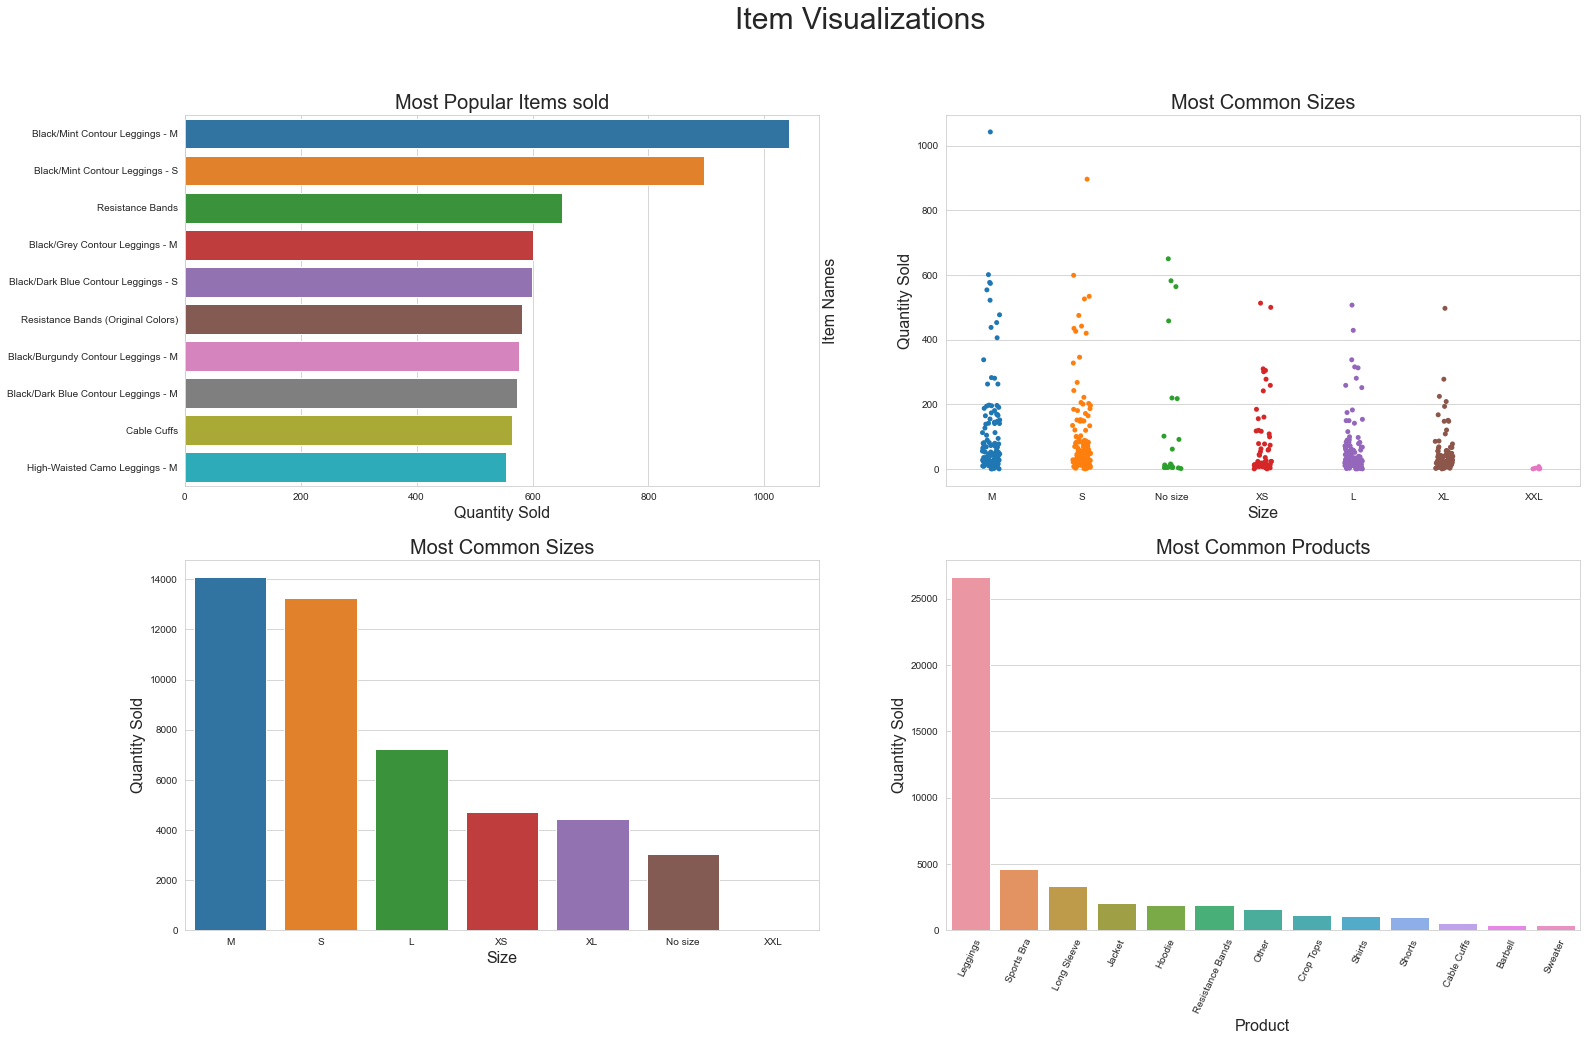

In [23]:
## We plot a couple of plots to get information about our items. 

fig, axes = plt.subplots(2,2, figsize=(25,15))
fig.suptitle('Item Visualizations', fontsize =30)

## 1) Barplot of Most Popular Items
sns.barplot(ax = axes[0,0], y= items['Lineitem name'][0:10], x='Times_Purchased', data = items)
axes[0,0].set_ylabel('Item Names', fontsize =16)
axes[0,0].yaxis.set_label_position('right')
axes[0,0].set_xlabel('Quantity Sold', fontsize =16)
axes[0,0].set_title('Most Popular Items sold', fontsize =20)

## 2) Barplot of Most Popular Items
sns.stripplot(ax =axes[0,1], x='size', y='Times_Purchased', data = items)
axes[0,1].set_ylabel('Quantity Sold', fontsize =16)
axes[0,1].set_xlabel('Size', fontsize =16)
axes[0,1].set_title('Most Common Sizes', fontsize =20)

## 3) Barplot of Most Popular Items
items_size = items.groupby(['size']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,0], x='size', y= 'Times_Purchased', data = items_size)
axes[1,0].set_ylabel('Quantity Sold', fontsize =16)
axes[1,0].set_xlabel('Size', fontsize =16)
axes[1,0].set_title('Most Common Sizes', fontsize =20)


## 4) Most Common Products
items_type = items.groupby(['type']).sum().reset_index().sort_values('Times_Purchased', ascending = False)
sns.barplot(ax =axes[1,1], x='type', y='Times_Purchased', data = items_type)
axes[1,1].set_ylabel('Quantity Sold', fontsize =16)
axes[1,1].set_xlabel('Product', fontsize =16)
axes[1,1].set_xticklabels(items_type['type'],fontsize =10, rotation =65)
axes[1,1].set_title('Most Common Products', fontsize =20)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
plt.show()

## EDA Findings Summary:
- Since the first order for customers is equally distributed, and 75% of orders were made before Nov-2020, we can calculate a **CLTV over 1 year** and discard the customers who made their first order after Nov-2020. We will only be losing ~25% of our data which is fine. 
- The majority of items sold are leggings (more than all other products combined). Therefore, it might be more interesting to refine the Product type category and break down the leggings even further to see if some of them sell better than others. 

## Preparing the Data for CLTV Analysis. 

As a result from these visualizations, we are able to see that it is appropriate to use one year interval for our CLTV analysis. Let's create this. 

In [24]:
## We define our date_limit for the analyis. We will remove data before this date. 

date_limit = customer['Most_Recent_Order'].max() - timedelta(days=365)
print('The most recent date in our dataset is '+ str(customer['Most_Recent_Order'].max()) + ' therefore, our date limit is: ' + str(date_limit) )

## Creating a CLTV customers dataframe: 
customer_cltv = customer[customer['First_Order'] < date_limit]

# For each customer, we create a cltv_start date and a cltv end date. 
customer_cltv['cltv_start'] = customer_cltv['First_Order'] + timedelta(days=7)
customer_cltv['cltv_end'] = customer_cltv['First_Order'] + timedelta(days=365)

customer_cltv = customer_cltv[customer_cltv['CustomerID'] != '#REF!']

## Let's preview the first 3 rows. 
print('Our previous customer table contained ' + str(customer.CustomerID.count()) + ' different customers. After removing those who made their first purchase after November 11th 2020, we are left with ' + str(customer_cltv.CustomerID.count()))
customer_cltv.sort_values('CustomerID').head(3)

The most recent date in our dataset is 2021-11-11 16:53:00 therefore, our date limit is: 2020-11-11 16:53:00
Our previous customer table contained 16180 different customers. After removing those who made their first purchase after November 11th 2020, we are left with 11721


,CustomerID,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer,year_month_oldest,cltv_start,cltv_end
8313,Anonymous1000,1,1,15.00,15.0,15.0,15.00,0,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,0.0,0,2018-11,2018-12-03 11:05:00,2019-11-26 11:05:00
511,Anonymous10000,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00
8301,Anonymous10001,1,3,57.00,57.0,57.0,57.00,0,2019-06-22 22:40:00,2019-06-22 22:40:00,0.0,0.0,0,2019-06,2019-06-29 22:40:00,2020-06-21 22:40:00


Now that we have our new customers table which has the newly created cltv start and end dates for each customer, we will merge the customer stats table with the raw data clv table and the items table so that for each row, we get the cltv dates and item breakdowns for all the customers.

In [25]:
## We merge our customer_stats_cltv with both the raw_data as well as the items tables. 
merged_data = raw_data.merge(customer_cltv, left_on = 'CustomerID', right_on = 'CustomerID').sort_values('CustomerID')
merged_data = merged_data.merge(items, left_on = 'Lineitem name', right_on = 'Lineitem name').sort_values('CustomerID')
print('The total number of items purchased before the limit date of Nov 11th 2020 is ' +str(merged_data['OrderID'].count()))
merged_data.head(3)

The total number of items purchased before the limit date of Nov 11th 2020 is 34458


,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer,year_month_oldest,cltv_start,cltv_end,Product Sku,Times_Purchased,Price,size,type
0,#2976,Anonymous1000,paid,2018-11-26 11:05:00,fulfilled,yes,15.0,3.18,0.0,18.18,,0.0,First Class Package,1,Barbell Pads,15.0,Findlay,'45840,OH,US,NaN,Shopify Payments,0.0,0.0,1,1,15.00,15.0,15.0,15.00,0,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,0.0,0,2018-11,2018-12-03 11:05:00,2019-11-26 11:05:00,54,218,16.0,No size,Barbell
728,#3044,Anonymous10000,paid,2018-12-04 06:47:00,fulfilled,yes,45.0,3.66,0.0,48.66,,0.0,First Class Package,1,High-Waisted Leggings Grey - L,45.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00,165,72,48.0,L,Leggings
800,#11708,Anonymous10000,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,,0.0,NaN,1,High-Waisted Leggings Black - XL,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00,95,148,48.0,XL,Leggings


Now for each transaction, we have thei cltv start and end dates of their respective customers as well as the breakdown of sizes and types of item. Now we want to filter this data so that we get transactions that fall within the one year cltv period for each customer. Additionally, we will want to track how many of these orders were made within the first week. The data then gets filtered: 

In [26]:
## Now we want to filter cltv_data so that all the items ordered are within our cltv dates. 
cltv_data  = merged_data[(merged_data ['Transaction Date'] >= merged_data ['First_Order']) & (merged_data ['Transaction Date'] <= merged_data ['cltv_end'])]
cltv_data_one_week  = cltv_data[(cltv_data ['Transaction Date'] >= cltv_data ['First_Order']) & (cltv_data ['Transaction Date'] <= cltv_data ['cltv_start'])]
print('The number of items purchased that fall within the one year CLTV will be ' + str(cltv_data['OrderID'].count()))
print('The number of items purchased that fall within the first week of the one year CLTV will be ' + str(cltv_data_one_week['OrderID'].count()))
cltv_data.head(2)

The number of items purchased that fall within the one year CLTV will be 18268
The number of items purchased that fall within the first week of the one year CLTV will be 12486


,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer,year_month_oldest,cltv_start,cltv_end,Product Sku,Times_Purchased,Price,size,type
0,#2976,Anonymous1000,paid,2018-11-26 11:05:00,fulfilled,yes,15.0,3.18,0.0,18.18,,0.0,First Class Package,1,Barbell Pads,15.0,Findlay,'45840,OH,US,NaN,Shopify Payments,0.0,0.0,1,1,15.00,15.0,15.0,15.00,0,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,0.0,0,2018-11,2018-12-03 11:05:00,2019-11-26 11:05:00,54,218,16.0,No size,Barbell
728,#3044,Anonymous10000,paid,2018-12-04 06:47:00,fulfilled,yes,45.0,3.66,0.0,48.66,,0.0,First Class Package,1,High-Waisted Leggings Grey - L,45.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00,165,72,48.0,L,Leggings


Our features variables are currently categorized and we want tidy data. Below, we will create a function that will be able to perform one hot encoding, where we replace the categorical values in size and type to and assign 0 if this is not the case for the transaction and 1 if it is. 

In [27]:
## We define the function and apply it to both the cltv_data and the one week cltv. 
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

cltv_data = encode_and_bind(cltv_data, 'size')
cltv_data = encode_and_bind(cltv_data, 'type')
cltv_data_one_week = encode_and_bind(cltv_data_one_week , 'size')
cltv_data_one_week  = encode_and_bind(cltv_data_one_week , 'type')
cltv_data.head(2)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer,year_month_oldest,cltv_start,cltv_end,Product Sku,Times_Purchased,Price,size,type,size_L,size_M,size_No size,size_S,size_XL,size_XS,size_XXL,type_Barbell,type_Cable Cuffs,type_Crop Tops,type_Hoodie,type_Jacket,type_Leggings,type_Long Sleeve,type_Other,type_Resistance Bands,type_Shirts,type_Shorts,type_Sports Bra,type_Sweater
0,#2976,Anonymous1000,paid,2018-11-26 11:05:00,fulfilled,yes,15.0,3.18,0.0,18.18,,0.0,First Class Package,1,Barbell Pads,15.0,Findlay,'45840,OH,US,NaN,Shopify Payments,0.0,0.0,1,1,15.00,15.0,15.0,15.00,0,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,0.0,0,2018-11,2018-12-03 11:05:00,2019-11-26 11:05:00,54,218,16.0,No size,Barbell,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
728,#3044,Anonymous10000,paid,2018-12-04 06:47:00,fulfilled,yes,45.0,3.66,0.0,48.66,,0.0,First Class Package,1,High-Waisted Leggings Grey - L,45.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00,165,72,48.0,L,Leggings,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
cltv_data_one_week.head(2)

,OrderID,CustomerID,Financial Status,Transaction Date,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Taxes,Total,Discount Code,Discount Amount,Shipping Method,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,Billing Country,Cancelled at,Payment Method,Refunded Amount,Lineitem discount,Number_of_Orders,Total_Items_Purchased,Total_Spent,Smallest_purchase,Largest_purchase,Average_order_spend,Coupons_Used,First_Order,Most_Recent_Order,Time_Elapsed_days,Frequency_in_days,repeat_customer,year_month_oldest,cltv_start,cltv_end,Product Sku,Times_Purchased,Price,size,type,size_L,size_M,size_No size,size_S,size_XL,size_XS,type_Barbell,type_Cable Cuffs,type_Crop Tops,type_Hoodie,type_Jacket,type_Leggings,type_Long Sleeve,type_Other,type_Resistance Bands,type_Shirts,type_Shorts,type_Sports Bra,type_Sweater
0,#2976,Anonymous1000,paid,2018-11-26 11:05:00,fulfilled,yes,15.0,3.18,0.0,18.18,,0.0,First Class Package,1,Barbell Pads,15.0,Findlay,'45840,OH,US,NaN,Shopify Payments,0.0,0.0,1,1,15.00,15.0,15.0,15.00,0,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,0.0,0,2018-11,2018-12-03 11:05:00,2019-11-26 11:05:00,54,218,16.0,No size,Barbell,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
728,#3044,Anonymous10000,paid,2018-12-04 06:47:00,fulfilled,yes,45.0,3.66,0.0,48.66,,0.0,First Class Package,1,High-Waisted Leggings Grey - L,45.0,Tucson,'85757,AZ,US,NaN,Shopify Payments,0.0,0.0,5,7,297.25,45.0,98.0,59.45,1,2018-12-04 06:47:00,2020-11-27 08:10:00,724.0,144.8,1,2018-12,2018-12-11 06:47:00,2019-12-04 06:47:00,165,72,48.0,L,Leggings,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Now that we have performed the encoding and modified the columns, the next step will be to re-aggregate cltv_data and cltv_one_week data by customer now that we have all the information, then perform one last merge where we will be able to have information on the transactions during both each customers CLTV period and the transactions within one week after each customer's first order. 

In [29]:
## We start by creating the customer CLTV table. 
customer_cltv = cltv_data.groupby('CustomerID').agg(
            CLTV_Total_Spent = ('Subtotal', sum),
            Smallest_Purchase = ('Subtotal', min),    
            Largest_Purchase = ('Subtotal', max),
            Average_order_spend = ('Subtotal', np.mean),
            Number_of_orders = ('Subtotal', 'nunique'),
            First_Order = ('Transaction Date', min),   
            Last_Order = ('Transaction Date', max),
            Time_Elapsed = ('Transaction Date', time_elapsed),
            Frequency_in_days =('Transaction Date', order_freq),
            cltv_start =('cltv_start', max),
            cltv_end =('cltv_end', max),
            repeat_customer =('repeat_customer', max),
            Size_XSmall =('size_XS', max),
            Size_Small =('size_S', max),
            Size_Medium =('size_M', max),
            Size_Large =('size_L', max),
            Size_XLarge =('size_XL', max),
            No_Size =('size_No size', max),
            Type_Barbell =('type_Barbell', max),
            Type_CableCuffs =('type_Cable Cuffs', max),
            Type_CropTops =('type_Crop Tops', max),
            Type_Hoodie =('type_Hoodie', max),
            Type_Jacket =('type_Jacket', max),
            Type_Leggings =('type_Leggings', max),
            Type_LongSleeve =('type_Long Sleeve', max),
            Type_ResistanceBands =('type_Resistance Bands', max),
            Type_Shirts =('type_Shirts', max),
            Type_Shorts =('type_Shorts', max),
            Type_SportsBra =('type_Sports Bra', max),
            Type_Sweater =('type_Sweater', max),
            Type_Other =('type_Other', max)).reset_index()
customer_cltv.head(2)

,CustomerID,CLTV_Total_Spent,Smallest_Purchase,Largest_Purchase,Average_order_spend,Number_of_orders,First_Order,Last_Order,Time_Elapsed,Frequency_in_days,cltv_start,cltv_end,repeat_customer,Size_XSmall,Size_Small,Size_Medium,Size_Large,Size_XLarge,No_Size,Type_Barbell,Type_CableCuffs,Type_CropTops,Type_Hoodie,Type_Jacket,Type_Leggings,Type_LongSleeve,Type_ResistanceBands,Type_Shirts,Type_Shorts,Type_SportsBra,Type_Sweater,Type_Other
0,Anonymous1000,15.0,15.0,15.0,15.000000,1,2018-11-26 11:05:00,2018-11-26 11:05:00,0,0.000000,2018-12-03 11:05:00,2019-11-26 11:05:00,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Anonymous10000,143.0,45.0,50.0,47.666667,3,2018-12-04 06:47:00,2019-11-30 08:53:00,361,120.333333,2018-12-11 06:47:00,2019-12-04 06:47:00,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [30]:
## Now we do the same but for orders only in the first week. 
customer_cltv_first_week = cltv_data_one_week.groupby('CustomerID').agg(
            CLTV_one_Week = ('Subtotal', sum),
            Average_spend_one_week = ('Subtotal', np.mean),
            Number_of_orders_one_week = ('Subtotal', 'nunique'),
            First_Order = ('Transaction Date', min),   
            Last_Order = ('Transaction Date', max),
            Frequency_in_days =('Transaction Date', order_freq),
            cltv_start =('cltv_start', max),
            cltv_end =('cltv_end', max),
            fw_Size_XSmall =('size_XS', max),
            fw_Size_Small =('size_S', max),
            fw_Size_Medium =('size_M', max),
            fw_Size_Large =('size_L', max),
            fw_Size_XLarge =('size_XL', max),
            fw_No_Size =('size_No size', max),
            fw_Type_Barbell =('type_Barbell', max),
            fw_Type_CableCuffs =('type_Cable Cuffs', max),
            fw_Type_CropTops =('type_Crop Tops', max),
            fw_Type_Hoodie =('type_Hoodie', max),
            fw_Type_Jacket =('type_Jacket', max),
            fw_Type_Leggings =('type_Leggings', max),
            fw_Type_LongSleeve =('type_Long Sleeve', max),
            fw_Type_ResistanceBands =('type_Resistance Bands', max),
            fw_Type_Shirts =('type_Shirts', max),
            fw_Type_Shorts =('type_Shorts', max),
            fw_Type_SportsBra =('type_Sports Bra', max),
            fw_Type_Sweater =('type_Sweater', max),
            fw_Type_Other =('type_Other', max)).reset_index()

customer_cltv_first_week.head(2)

,CustomerID,CLTV_one_Week,Average_spend_one_week,Number_of_orders_one_week,First_Order,Last_Order,Frequency_in_days,cltv_start,cltv_end,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other
0,Anonymous1000,15.0,15.0,1,2018-11-26 11:05:00,2018-11-26 11:05:00,0.0,2018-12-03 11:05:00,2019-11-26 11:05:00,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Anonymous10000,45.0,45.0,1,2018-12-04 06:47:00,2018-12-04 06:47:00,0.0,2018-12-11 06:47:00,2019-12-04 06:47:00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


Now we merge them together to create the last table that we will need to work on our analysis. 

In [31]:
## We merge both together and output our final table that contains information on all the purchases.
merged_cltv = customer_cltv.merge(customer_cltv_first_week, left_on = 'CustomerID', right_on = 'CustomerID').sort_values('CustomerID')
merged_cltv = merged_cltv[['CustomerID','CLTV_Total_Spent','CLTV_one_Week','Number_of_orders',
                           'Number_of_orders_one_week','First_Order_x','cltv_start_x','cltv_end_x',
                           'repeat_customer','Size_XSmall','Size_Small','Size_Medium','Size_Large',
                           'Size_XLarge','No_Size','Type_Barbell','Type_CableCuffs','Type_CropTops',
                           'Type_Hoodie','Type_Jacket','Type_Leggings','Type_LongSleeve','Type_ResistanceBands','Type_Shirts',
                           'Type_Shorts','Type_SportsBra','Type_Sweater','Type_Other','fw_Size_XSmall','fw_Size_Small',
                           'fw_Size_Medium','fw_Size_Large','fw_Size_XLarge','fw_No_Size','fw_Type_Barbell','fw_Type_CableCuffs',
                           'fw_Type_CropTops','fw_Type_Hoodie','fw_Type_Jacket','fw_Type_Leggings','fw_Type_LongSleeve','fw_Type_ResistanceBands',
                           'fw_Type_Shirts','fw_Type_Shorts','fw_Type_SportsBra','fw_Type_Sweater','fw_Type_Other']]
merged_cltv.head()

,CustomerID,CLTV_Total_Spent,CLTV_one_Week,Number_of_orders,Number_of_orders_one_week,First_Order_x,cltv_start_x,cltv_end_x,repeat_customer,Size_XSmall,Size_Small,Size_Medium,Size_Large,Size_XLarge,No_Size,Type_Barbell,Type_CableCuffs,Type_CropTops,Type_Hoodie,Type_Jacket,Type_Leggings,Type_LongSleeve,Type_ResistanceBands,Type_Shirts,Type_Shorts,Type_SportsBra,Type_Sweater,Type_Other,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other
0,Anonymous1000,15.0,15.0,1,1,2018-11-26 11:05:00,2018-12-03 11:05:00,2019-11-26 11:05:00,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Anonymous10000,143.0,45.0,3,1,2018-12-04 06:47:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Anonymous10001,57.0,57.0,1,1,2019-06-22 22:40:00,2019-06-29 22:40:00,2020-06-21 22:40:00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Anonymous10002,43.2,43.2,1,1,2019-11-30 09:42:00,2019-12-07 09:42:00,2020-11-29 09:42:00,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Anonymous10003,35.0,35.0,1,1,2020-11-03 08:19:00,2020-11-10 08:19:00,2021-11-03 08:19:00,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Finally, to get the last bit of information, we create two functions which will retrieve the item sku and frequency of purchase for each customer during the cltv and one week after first order periods. 

## Creating our FINAL CLTV TABLE by Customer

In [32]:
## Lastyly, we get the item sku and frequency purchased in CLTV both in total and in the first week. 
'''
def get_customer_purchases_cltv(row):
    customer_email = row['CustomerID']
    items_purchased = cltv_data.loc[cltv_data['CustomerID'] == customer_email]['Lineitem name']
    dict_items_purchased = {}
    for item in items_purchased:
        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]
        if item_sku not in dict_items_purchased.keys():
            dict_items_purchased[item_sku] = 1
        else:
            dict_items_purchased[item_sku] += 1
    return dict_items_purchased


def get_customer_purchases_cltv_one_week(row):
    customer_email = row['CustomerID']
    items_purchased = cltv_data_one_week.loc[cltv_data_one_week['CustomerID'] == customer_email]['Lineitem name']
    dict_items_purchased = {}
    for item in items_purchased:
        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]
        if item_sku not in dict_items_purchased.keys():
            dict_items_purchased[item_sku] = 1
        else:
            dict_items_purchased[item_sku] += 1
    return dict_items_purchased

merged_cltv['Products_Purchased'] = merged_cltv.apply(get_customer_purchases_cltv, axis=1)
merged_cltv['Products_Purchased_first_week'] = merged_cltv.apply(get_customer_purchases_cltv_one_week, axis=1)

## We preview our final our completed table! 
merged_cltv.head()
'''

"\ndef get_customer_purchases_cltv(row):\n    customer_email = row['CustomerID']\n    items_purchased = cltv_data.loc[cltv_data['CustomerID'] == customer_email]['Lineitem name']\n    dict_items_purchased = {}\n    for item in items_purchased:\n        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]\n        if item_sku not in dict_items_purchased.keys():\n            dict_items_purchased[item_sku] = 1\n        else:\n            dict_items_purchased[item_sku] += 1\n    return dict_items_purchased\n\n\ndef get_customer_purchases_cltv_one_week(row):\n    customer_email = row['CustomerID']\n    items_purchased = cltv_data_one_week.loc[cltv_data_one_week['CustomerID'] == customer_email]['Lineitem name']\n    dict_items_purchased = {}\n    for item in items_purchased:\n        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]\n        if item_sku not in dict_items_purchased.keys():\n            dict_items_purchased[item_sku] = 1\n   

In [33]:
merged_cltv.rename(columns={'CLTV_Total_Spent':'CLTV_one_year','CLTV_one_Week':'First_Week_Spent'}, inplace = True)
CLTV_avg = merged_cltv.CLTV_one_year.mean()
CLTV_avg_one_week = merged_cltv.First_Week_Spent.mean()
CLTV_avg_repeat = merged_cltv['CLTV_one_year'][merged_cltv['repeat_customer'] > 0].mean()
CLTV_avg_repeat_one_week = merged_cltv['First_Week_Spent'][merged_cltv['repeat_customer'] > 0].mean()
customer_count = merged_cltv['CustomerID'].count()
repeat_customer_count = merged_cltv['CustomerID'][merged_cltv['repeat_customer'] >0].count()

print('The number of customers with a one year CLTV is: ' + str(customer_count))
print('The number of repeat customers within the one year CLTV is: ' + str(repeat_customer_count))
print('The one year CLTV of customers is: $' + str(round(CLTV_avg,2)))
print('The first week CLTV of customers is: $' + str(round(CLTV_avg_one_week,2)))
print('The one year CLTV of repeat customers is: $' + str(round(CLTV_avg_repeat,2)))
print('The first week CLTV of repeat customers is: $' + str(round(CLTV_avg_repeat_one_week,2)))

The number of customers with a one year CLTV is: 11721
The number of repeat customers within the one year CLTV is: 3786
The one year CLTV of customers is: $101.56
The first week CLTV of customers is: $66.67
The one year CLTV of repeat customers is: $188.34
The first week CLTV of repeat customers is: $80.32


## First Week CLTV Table Final

In [34]:
merged_cltv_fw = merged_cltv
merged_cltv_fw.head(2)

,CustomerID,CLTV_one_year,First_Week_Spent,Number_of_orders,Number_of_orders_one_week,First_Order_x,cltv_start_x,cltv_end_x,repeat_customer,Size_XSmall,Size_Small,Size_Medium,Size_Large,Size_XLarge,No_Size,Type_Barbell,Type_CableCuffs,Type_CropTops,Type_Hoodie,Type_Jacket,Type_Leggings,Type_LongSleeve,Type_ResistanceBands,Type_Shirts,Type_Shorts,Type_SportsBra,Type_Sweater,Type_Other,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other
0,Anonymous1000,15.0,15.0,1,1,2018-11-26 11:05:00,2018-12-03 11:05:00,2019-11-26 11:05:00,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Anonymous10000,143.0,45.0,3,1,2018-12-04 06:47:00,2018-12-11 06:47:00,2019-12-04 06:47:00,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [35]:
merged_cltv_fw['CLTV_post_firstweek'] = merged_cltv_fw['CLTV_one_year'] - merged_cltv_fw['First_Week_Spent']
merged_cltv_fw.drop(columns=['CLTV_one_year','repeat_customer','Number_of_orders','First_Order_x','cltv_start_x','cltv_end_x','Size_XSmall','Size_Small',
                             'Size_Medium','Size_Large','Size_XLarge','No_Size','Type_Barbell','Type_CableCuffs',
                             'Type_CropTops','Type_Hoodie','Type_Jacket','Type_Leggings','Type_LongSleeve','Type_Other',
                             'Type_ResistanceBands','Type_Shirts','Type_Shorts','Type_SportsBra','Type_Sweater'],inplace =True)
merged_cltv_fw.head(2)

,CustomerID,First_Week_Spent,Number_of_orders_one_week,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,CLTV_post_firstweek
0,Anonymous1000,15.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,Anonymous10000,45.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0


In [36]:
def order_range(row):
    if row['CLTV_post_firstweek'] <= 50 :
        return '<$50'
    elif row['CLTV_post_firstweek'] <= 100 :
        return '$50-100' 
    elif row['CLTV_post_firstweek'] <= 200: 
        return '$100-200'
    else:
        return '>$200'
merged_cltv_fw['CLTV_Range'] = merged_cltv_fw.apply(order_range, axis=1)
merged_cltv_fw.head(2)

,CustomerID,First_Week_Spent,Number_of_orders_one_week,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,CLTV_post_firstweek,CLTV_Range
0,Anonymous1000,15.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,<$50
1,Anonymous10000,45.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0,$50-100


# EDA 

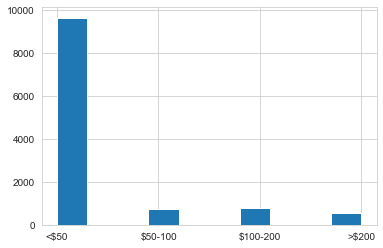

In [37]:
_ = plt.hist('CLTV_Range', data =merged_cltv_fw )

# Modeling

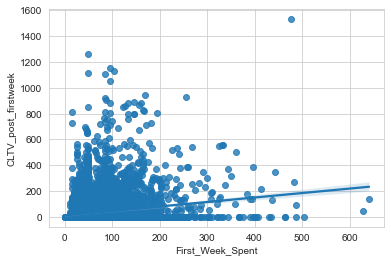

In [38]:
sns.regplot(data = merged_cltv_fw, x ='First_Week_Spent',y='CLTV_post_firstweek')
plt.show()

In [39]:
X = merged_cltv_fw[['First_Week_Spent']]
y = merged_cltv_fw[['CLTV_post_firstweek']]
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8790, 1) (8790, 1)
(2931, 1) (2931, 1)


In [40]:
from sklearn.linear_model import LinearRegression
rModel = linear_model.LinearRegression(normalize = True)

In [41]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [42]:
print(rModel.score(X_train,y_train))

0.03742408579375056


In [43]:
y_pred = rModel.predict(X_test)

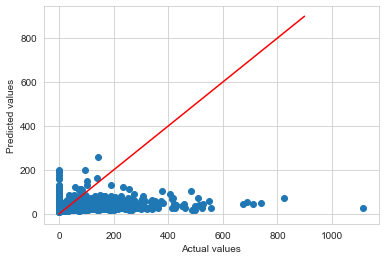

In [44]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([x for x in range(0,900)],[x for x in range(0,900)], color='r')
plt.show()

In [45]:
merged_cltv_fw

,CustomerID,First_Week_Spent,Number_of_orders_one_week,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,CLTV_post_firstweek,CLTV_Range
0,Anonymous1000,15.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,<$50
1,Anonymous10000,45.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0,$50-100
2,Anonymous10001,57.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,<$50
3,Anonymous10002,43.2,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,<$50
4,Anonymous10003,35.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,<$50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11716,Anonymous9993,45.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,<$50
11717,Anonymous9994,45.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,241.0,>$200
11718,Anonymous9996,50.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,<$50
11719,Anonymous9998,50.0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,<$50


In [46]:
X = merged_cltv_fw.drop(['CustomerID','CLTV_Range','CLTV_post_firstweek'],axis=1)
X = sm.add_constant(X)
y = merged_cltv_fw['CLTV_post_firstweek']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state = 123)

In [47]:
rmodel = sm.OLS(y_train, X_train)
results =rmodel.fit()

In [48]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CLTV_post_firstweek   R-squared:                       0.041
Model:                             OLS   Adj. R-squared:                  0.038
Method:                  Least Squares   F-statistic:                     17.63
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):           3.90e-64
Time:                         07:30:31   Log-Likelihood:                -51980.
No. Observations:                 8790   AIC:                         1.040e+05
Df Residuals:                     8768   BIC:                         1.042e+05
Df Model:                           21                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -14.2990      6.995     -2.044      0.041     -28.011      -0.587
First_Week_Spent              0.2951      0.024     12.516      0.000       0.249       0.341
Number_of_orders_one_week    14.4926      7.340      1.974      0.048       0.104      28.881
fw_Size_XSmall               -3.1389      9.149     -0.343      0.732     -21.072      14.794
fw_Size_Small                -3.3587      8.888     -0.378      0.706     -20.780      14.063
fw_Size_Medium                0.1005      8.833      0.011      0.991     -17.215      17.416
fw_Size_Large                 6.3176      9.026      0.700      0.484     -11.375      24.010
fw_Size_XLarge               14.5898      9.352      1.560      0.119      -3.742      32.922
fw_No_Size                   10.9616     19.010      0.577      0.564     -26.302      48.226
fw_Type_Barbell             -10.4214     19.873     -0.524      0.600     -49.377      28.534
fw_Type_CableCuffs           11.4202     19.057      0.599      0.549     -25.935      48.776
fw_Type_CropTops             26.2131     12.295      2.132      0.033       2.113      50.314
fw_Type_Hoodie               16.3691      9.859      1.660      0.097      -2.958      35.696
fw_Type_Jacket                8.3149      9.939      0.837      0.403     -11.168      27.798
fw_Type_Leggings             15.4917      9.287      1.668      0.095      -2.714      33.697
fw_Type_LongSleeve           15.1523      9.807      1.545      0.122      -4.072      34.377
fw_Type_ResistanceBands      -2.4561     18.799     -0.131      0.896     -39.307      34.395
fw_Type_Shirts               11.0456     10.230      1.080      0.280      -9.007      31.098
fw_Type_Shorts                0.7802     19.493      0.040      0.968     -37.430      38.990
fw_Type_SportsBra             5.4547      9.727      0.561      0.575     -13.613      24.522
fw_Type_Sweater              14.7480     31.207      0.473      0.637     -46.425      75.921
fw_Type_Other                 6.8442     10.565      0.648      0.517     -13.866      27.554
==============================================================================
Omnibus:                     8736.159   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           544567.641
Skew:                           4.862   Prob(JB):                         0.00
Kurtosis:                      40.314   Cond. No.                     3.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

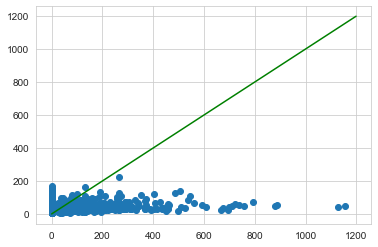

In [49]:
y_pred = results.predict(X_test)
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0,1200)],[x for x in range(0,1200)], color='g')

# Label it nicely
plt.show()

In [50]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = results.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns = {'CLTV_post_firstweek':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

88.65513173633465

In [51]:
matches['difference'] = (matches['actual'] - matches['predicted'])**2
matches['difference_not_squared'] = abs((matches['actual'] - matches['predicted']))

In [52]:
MAE = np.mean(matches.difference_not_squared)
print(MAE)

49.66712557064485


## Creating our FINAL CLTV TABLE by Item Ordered

In [53]:
print('We start with ' +str(raw_data['Lineitem name'].count()) + ' rows in the raw data.')

We start with 46372 rows in the raw data.


In [54]:
## After merging our tables, 
fw_items = raw_data[['OrderID','CustomerID','Transaction Date', 'Subtotal','Discount Code','Discount Amount','Lineitem quantity','Lineitem name','Lineitem price','Billing City','Billing Zip','Billing Province']]
fw_items[['Transaction Date','Billing City','Billing Zip','Billing Province']] = fw_items[['Transaction Date','Billing City','Billing Zip','Billing Province']].fillna(method='ffill')
fw_items['Billing Zip'] = fw_items['Billing Zip'].apply(lambda x: str.replace(x,"'",''))
fw_items = fw_items.merge(customer_cltv_first_week, left_on='CustomerID', right_on ='CustomerID')
print('After merging with the cltv_first_week, the total items are : ' + str(fw_items['Lineitem name'].count()))
print('Total unique orders : ' + str(fw_items.OrderID.nunique()))
print('Total unique customers: ' + str(fw_items.CustomerID.nunique()))

After merging with the cltv_first_week, the total items are : 34458
Total unique orders : 19963
Total unique customers: 11721


In [55]:
fw_items  = fw_items[(fw_items['Transaction Date'] >= fw_items['First_Order']) & (fw_items['Transaction Date'] <= fw_items['cltv_start'])]
def order_range(row):
    if row['Subtotal'] <= 50 :
        return '<$50'
    elif row['Subtotal'] <= 100 :
        return '$50-100' 
    elif row['Subtotal'] <= 200: 
        return '$100-200'
    elif type(row['Subtotal']) == float and pd.isna(row['Subtotal']): 
        return 'Repeat order'
    else:
        return '>$200'
fw_items['Order_Range'] = fw_items.apply(order_range, axis=1)

print('Total items : ' + str(fw_items['Lineitem name'].count()))
print('Total unique orders : ' + str(fw_items.OrderID.nunique()))
print('Total customers : ' + str(fw_items.CustomerID.count()))
print('Total unique customers: ' + str(fw_items.CustomerID.nunique()))

fw_items.head(3)

Total items : 20315
Total unique orders : 12518
Total customers : 20315
Total unique customers: 11721


,OrderID,CustomerID,Transaction Date,Subtotal,Discount Code,Discount Amount,Lineitem quantity,Lineitem name,Lineitem price,Billing City,Billing Zip,Billing Province,CLTV_one_Week,Average_spend_one_week,Number_of_orders_one_week,First_Order,Last_Order,Frequency_in_days,cltv_start,cltv_end,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,Order_Range
1,#20544,Anonymous9987,2020-10-05 12:22:00,85.0,,0.0,1,Black Seamless Leggings - S,35.0,Moreno Valley,92553,CA,85.0,85.0,1,2020-10-05 12:22:00,2020-10-05 12:22:00,0.0,2020-10-12 12:22:00,2021-10-05 12:22:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,$50-100
2,#20544,Anonymous9987,2020-10-05 12:22:00,NaN,,0.0,1,Black/Mint Contour Leggings - S,50.0,Moreno Valley,92553,CA,85.0,85.0,1,2020-10-05 12:22:00,2020-10-05 12:22:00,0.0,2020-10-12 12:22:00,2021-10-05 12:22:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,Repeat order
6,#18400,Anonymous8266,2020-08-06 13:40:00,35.0,,0.0,1,Black Seamless Leggings - M,35.0,Sacramento,95823,CA,35.0,35.0,1,2020-08-06 13:40:00,2020-08-06 13:40:00,0.0,2020-08-13 13:40:00,2021-08-06 13:40:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,<$50


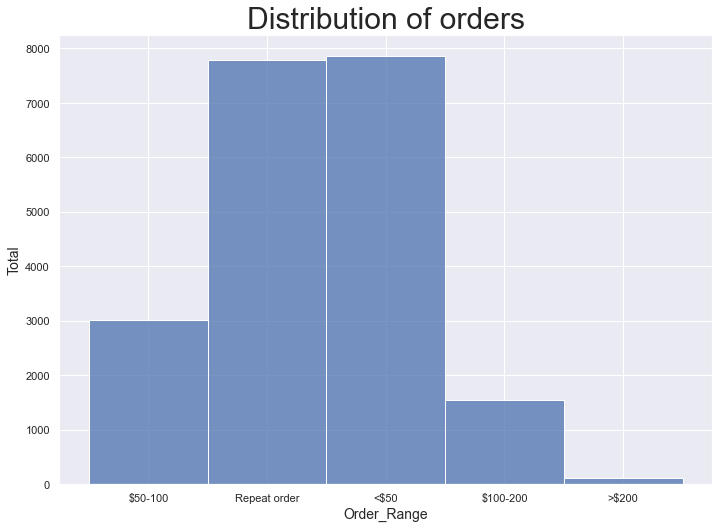

In [56]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax =sns.histplot(x='Order_Range', data = fw_items)
ax.set_title('Distribution of orders', fontsize =30)
ax.set_xlabel("Order_Range",fontsize=14)
ax.set_ylabel("Total",fontsize=14)
plt.show()

## CLTV Table by Order: 

In [57]:
orders.head(2)

,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer
20610,29489,142.0,3,Anonymous4245,2021-11-11 16:53:00,1
20609,29488,40.0,1,Anonymous9987,2021-11-11 10:09:00,1


In [58]:
orders_cltv_fw = orders.merge(customer_cltv_first_week, left_on='CustomerID', right_on ='CustomerID')
orders_cltv_fw  = orders_cltv_fw[(orders_cltv_fw['Transaction_Date'] >= orders_cltv_fw['First_Order']) & (orders_cltv_fw['Transaction_Date'] <= orders_cltv_fw['cltv_start'])]
print('Total Unique Orders in first week: ' +str(orders_cltv_fw.OrderID.count()))
orders_cltv_fw.head(2)

Total Unique Orders in first week: 12486


,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer,CLTV_one_Week,Average_spend_one_week,Number_of_orders_one_week,First_Order,Last_Order,Frequency_in_days,cltv_start,cltv_end,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other
1,20544,85.0,2,Anonymous9987,2020-10-05 12:22:00,1,85.0,85.0,1,2020-10-05 12:22:00,2020-10-05 12:22:00,0.0,2020-10-12 12:22:00,2021-10-05 12:22:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,18400,35.0,1,Anonymous8266,2020-08-06 13:40:00,1,35.0,35.0,1,2020-08-06 13:40:00,2020-08-06 13:40:00,0.0,2020-08-13 13:40:00,2021-08-06 13:40:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
def order_range(row):
    if row['Total_Spent'] <= 50 :
        return '<$50'
    elif row['Total_Spent'] <= 100 :
        return '$50-100' 
    elif row['Total_Spent'] <= 200: 
        return '$100-200'
    elif type(row['Total_Spent']) == float and pd.isna(row['Total_Spent']): 
        return 'Repeat order'
    else:
        return '>$200'


orders_cltv_fw ['Order_Range'] = orders_cltv_fw.apply(order_range, axis=1)

print('Total unique orders : ' + str(orders_cltv_fw.OrderID.nunique()))
print('Total customers : ' + str(orders_cltv_fw.CustomerID.count()))
print('Total unique customers: ' + str(orders_cltv_fw.CustomerID.nunique()))
orders_cltv_fw.head(2)

Total unique orders : 12486
Total customers : 12486
Total unique customers: 11721


,OrderID,Total_Spent,Total_Items_Purchased,CustomerID,Transaction_Date,repeat_customer,CLTV_one_Week,Average_spend_one_week,Number_of_orders_one_week,First_Order,Last_Order,Frequency_in_days,cltv_start,cltv_end,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,Order_Range
1,20544,85.0,2,Anonymous9987,2020-10-05 12:22:00,1,85.0,85.0,1,2020-10-05 12:22:00,2020-10-05 12:22:00,0.0,2020-10-12 12:22:00,2021-10-05 12:22:00,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,$50-100
5,18400,35.0,1,Anonymous8266,2020-08-06 13:40:00,1,35.0,35.0,1,2020-08-06 13:40:00,2020-08-06 13:40:00,0.0,2020-08-13 13:40:00,2021-08-06 13:40:00,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,<$50


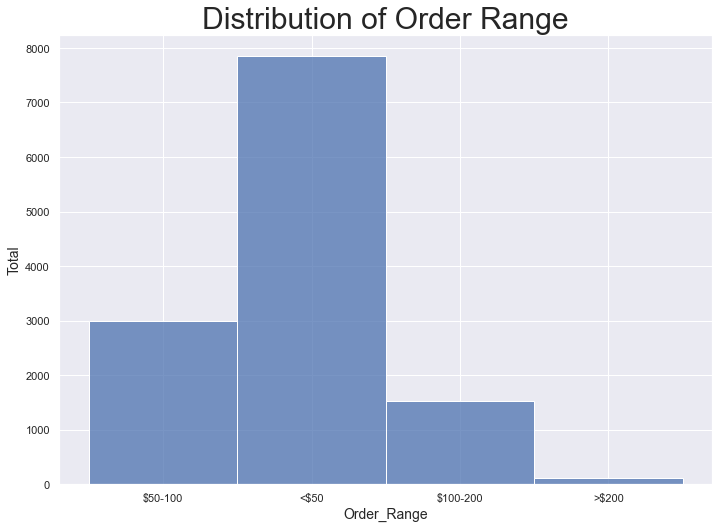

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax =sns.histplot(x='Order_Range', data = orders_cltv_fw)
ax.set_title('Distribution of Order Range', fontsize =30)
ax.set_xlabel("Order_Range",fontsize=14)
ax.set_ylabel("Total",fontsize=14)
plt.show()

# Modelling

In [61]:
merged_cltv.head(2)

,CustomerID,First_Week_Spent,Number_of_orders_one_week,fw_Size_XSmall,fw_Size_Small,fw_Size_Medium,fw_Size_Large,fw_Size_XLarge,fw_No_Size,fw_Type_Barbell,fw_Type_CableCuffs,fw_Type_CropTops,fw_Type_Hoodie,fw_Type_Jacket,fw_Type_Leggings,fw_Type_LongSleeve,fw_Type_ResistanceBands,fw_Type_Shirts,fw_Type_Shorts,fw_Type_SportsBra,fw_Type_Sweater,fw_Type_Other,CLTV_post_firstweek,CLTV_Range
0,Anonymous1000,15.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,<$50
1,Anonymous10000,45.0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,98.0,$50-100


In [62]:
sns.regplot(data = merged_cltv, x ='CLTV_one_Week',y='CLTV_Total_Spent')
plt.show()

KeyError: 'CLTV_one_Week'

In [ ]:
## Regression
X = merged_cltv[['CLTV_one_Week']]
y = merged_cltv[['CLTV_Total_Spent']]
 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.25, random_state =0)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
rModel = linear_model.LinearRegression(normalize = True)

In [ ]:
rModel.fit(X_train, y_train)

In [ ]:
print(rModel.score(X_train,y_train))

In [ ]:
y_pred = rModel.predict(X_test)

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.plot([x for x in range(0,900)],[x for x in range(0,900)], color='r')
plt.show()

In [ ]:
X = merged_cltv.drop(['CLTV_Total_Spent',"CustomerID", "First_Order_x","cltv_start_x","cltv_end_x","Products_Purchased",'Products_Purchased_first_week'],axis=1)
X = sm.add_constant(X)
y = merged_cltv[['CLTV_Total_Spent']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.25, random_state = 123)

In [ ]:
rmodel3 = sm.OLS(y_train, X_train)
results3 =rmodel3.fit()

In [ ]:
results3.summary()

In [ ]:
y_pred = results3.predict(X_test)
plt.scatter(y_test, y_pred)

# Add a line for perfect correlation
plt.plot([x for x in range(0,1200)],[x for x in range(0,1200)], color='g')

# Label it nicely
plt.show()

In [ ]:
# Define a function to check the RMSE. Remember the def keyword needed to make functions? 
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets)**2).mean())

y_pred = results3.predict(X_test)

matches = pd.DataFrame(y_test)
matches.rename(columns = {'CLTV_Total_Spent':'actual'}, inplace=True)
matches["predicted"] = y_pred

rmse(matches["actual"], matches["predicted"])

In [ ]:
matches['difference'] = (matches['actual'] - matches['predicted'])**2
matches['difference_not_squared'] = abs((matches['actual'] - matches['predicted']))

In [ ]:
MAE = np.mean(matches.difference_not_squared)
print(MAE)

## EDA Part 2: 

Now that we have our finalized table, we can look at a couple of interesting metrics!

This means that the first week of customers on average represents 65% of their 1 year CLTV. 

In [ ]:
sns.set(rc = {'figure.figsize':(40,30)})
sns.heatmap(merged_cltv.corr(), annot =True)
#sns.heatmap(merged_cltv.corr())
plt.show()

# OOP & Additional Functionalities

In [ ]:
'''
## We then create a column which will give the product sku and frequency purchased.

# We start by defining our function to parse the customer purchases. 

def parse_customer_purchases(row):
    """
    1. For the customer in this row in the customer dataframe, 
       go fetch all their purchases in the raw_data dataframe.
    2. Populate a dictionary that stores all the unique product skus corresponding to these purchases.
       The value for each sku is the number of times the item was purchased.
    """
    # Step 1: For this customer, find all their purchases
    customer_email = row['CustomerID']
    items_purchased = raw_data.loc[raw_data['CustomerID'] == customer_email]['Lineitem name']

    # Step 2: Create the empty dictionary
    # (key = product sku, value = number of times bought)
    dict_items_purchased = {}
    for item in items_purchased:
        # Step 2: For each item in the items_purchased, find its unique sku
        item_sku = items.loc[items['Lineitem name'] == item]['Product Sku'].values[0]
        # Step 2: If we have never seen that sku before, store it as a new entry in the dictionary.
        #         Give it a value of 1 as it's only showed up once in the items_purchased.
        if item_sku not in dict_items_purchased.keys():
            dict_items_purchased[item_sku] = 1
        # Step 2: If we have seen that sku before, it is in the dictionary keys and we add 1
        #         to the value, meaning that it's been purchased one more time. When we exit the
        #         loop, this will give us the total number of times the customer purchased that item.
        else:
            dict_items_purchased[item_sku] += 1

    return dict_items_purchased

# Using the apply method, we create a new column.
customer['Products_Purchased'] = customer.apply(parse_customer_purchases, axis=1)
customer.head(10)
'''

## Experiments: 

In [ ]:
class ItemInventory():
    """
    This class stores the specific information about the products sold by the shop in a dataframe.
    
    
    members:
        - inventory is a dataframe where each row is an individual item sold,
          and the columns are the features of the item.
          The first column is "item_id", which gives a unique identifier for the product.
    """
    def __init__(self, features, products, prices):
        """
        input:
            - features is a list of strings, corresponding to the desired features for the
              products (eg size, color, name etc.). It is possible that not every product sold
              has every feature (for example a sports equipment shop may sell clothing that will
              have a size feature, but also resistance bands that don't, etc.)
            - products is a list of strings, corresponding to the unique entries of the 'Lineitem name'
              column in the original dataset
            - prices is a list of strings, corresponding to the unique entries of the 'Lineitem price'
              column in the original dataset
        """
        self.inventory = pd.DataFrame()
        # TODO: Fill with index of the size of the unique count of entries in products
        self.inventory.add_column("item_id")
        # TODO: Aggregate the number of times every single product was purchased (i.e., how many
        #       times it is repeated in the products list)
        self.inventory.add_column("count")
        # TODO: Retreive corresponding price for each individual item
        self.inventory.add_column("price")
        for feature in features:
            self.inventory.add_column(feature)

        self.extract_features(products)
        
    def extract_features(self, products):
        """
        Each string in products contains the desired features we need to extract for each product,
        but they are ordered and separated in arbitrary ways across shops.
        """
        # TODO: Parse the strings in products to extract the relevant features and fill the other
        #       columns of self.inventory
            
    def find_item(self, item_id):
        return self.inventory.row(item_id)